Linear Classifier implementation from scratch in tensorflow

Note:
1. there is only one layer in the model and that too without any activation function
2. the samples and labels are not randomly distributed, they are stacked on top of each other
3. batch gradient descent is used (and not mini batch)
4. the data used is synthetic (we made it using np.random.multivariate_normal())
5. this is just to demonstrate the process of machine learning with minimal code and infrastructure required, without using keras functionality

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
num_samples_per_class = 1000
cov = [[1, 0.5], [0.5, 1]]

positive_samples = np.random.multivariate_normal(mean= [3, 0], cov= cov, size= num_samples_per_class)
negative_samples = np.random.multivariate_normal(mean= [0, 3], cov= cov, size= num_samples_per_class)

samples = np.concatenate((positive_samples, negative_samples)).astype('float32')
labels = np.concatenate((np.ones((num_samples_per_class, 1), dtype= 'float32'), np.zeros((num_samples_per_class, 1), dtype= 'float32')))

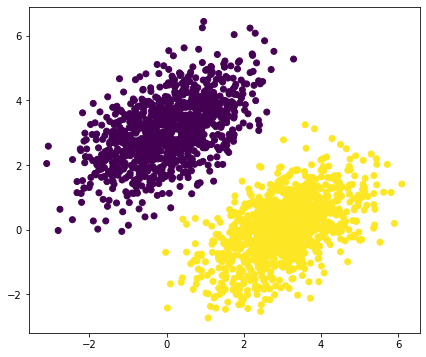

In [19]:
plt.figure(figsize= [7, 6])
plt.scatter(samples[:, 0], samples[:, 1], c= labels[:, 0])
plt.show()

In [60]:
# initializing weights and biases

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value= tf.random.uniform(shape= (input_dim, output_dim)))
b = tf.Variable(initial_value= tf.zeros(shape= (output_dim,)))

In [51]:
# model with only one layer without any activation function

def model(inputs):
  return tf.matmul(inputs, W) + b

In [52]:
# mean square loss function

def squared_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss)

In [53]:
# single training step

learning_rate = 0.1

def training_step(inputs, labels):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = squared_loss(labels, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [61]:
# training loop

epochs= 40

for epoch in range(epochs):
  loss = training_step(inputs= samples, labels= labels)
  print(f'Epoch #{epoch + 1}; Loss: {loss:.2f}')

Epoch #1; Loss: 1.88
Epoch #2; Loss: 0.19
Epoch #3; Loss: 0.11
Epoch #4; Loss: 0.10
Epoch #5; Loss: 0.09
Epoch #6; Loss: 0.08
Epoch #7; Loss: 0.08
Epoch #8; Loss: 0.07
Epoch #9; Loss: 0.07
Epoch #10; Loss: 0.06
Epoch #11; Loss: 0.06
Epoch #12; Loss: 0.06
Epoch #13; Loss: 0.05
Epoch #14; Loss: 0.05
Epoch #15; Loss: 0.05
Epoch #16; Loss: 0.05
Epoch #17; Loss: 0.05
Epoch #18; Loss: 0.04
Epoch #19; Loss: 0.04
Epoch #20; Loss: 0.04
Epoch #21; Loss: 0.04
Epoch #22; Loss: 0.04
Epoch #23; Loss: 0.04
Epoch #24; Loss: 0.04
Epoch #25; Loss: 0.03
Epoch #26; Loss: 0.03
Epoch #27; Loss: 0.03
Epoch #28; Loss: 0.03
Epoch #29; Loss: 0.03
Epoch #30; Loss: 0.03
Epoch #31; Loss: 0.03
Epoch #32; Loss: 0.03
Epoch #33; Loss: 0.03
Epoch #34; Loss: 0.03
Epoch #35; Loss: 0.03
Epoch #36; Loss: 0.03
Epoch #37; Loss: 0.03
Epoch #38; Loss: 0.03
Epoch #39; Loss: 0.03
Epoch #40; Loss: 0.03


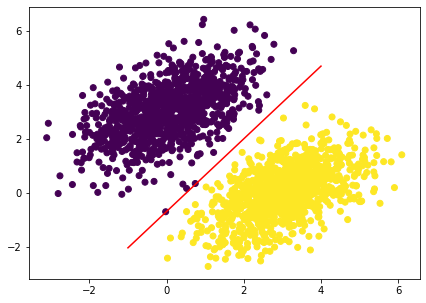

In [66]:
predictions = model(samples)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.figure(figsize= [7, 5])
plt.plot(x, y, '-r')
plt.scatter(samples[:, 0], samples[:, 1], c= predictions[:, 0] > 0.5)
plt.show()